Saving Mall_Customers.csv to Mall_Customers (1).csv
Uploaded file name: Mall_Customers (1).csv

There are 200 rows and 5 columns in the dataset

=== Column Distributions ===


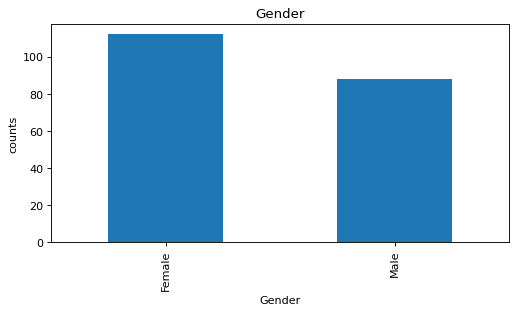


=== Correlation Matrix ===


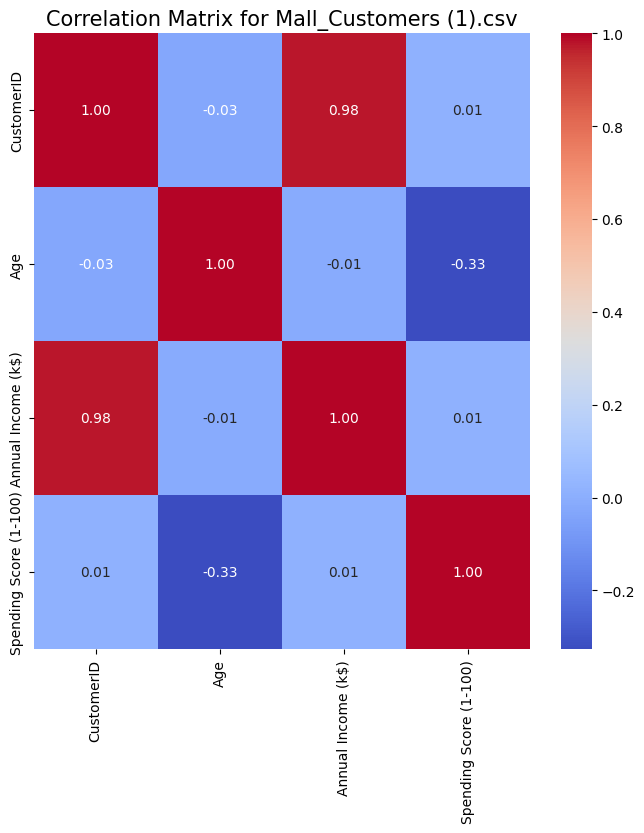


=== Scatter and Density Matrix ===


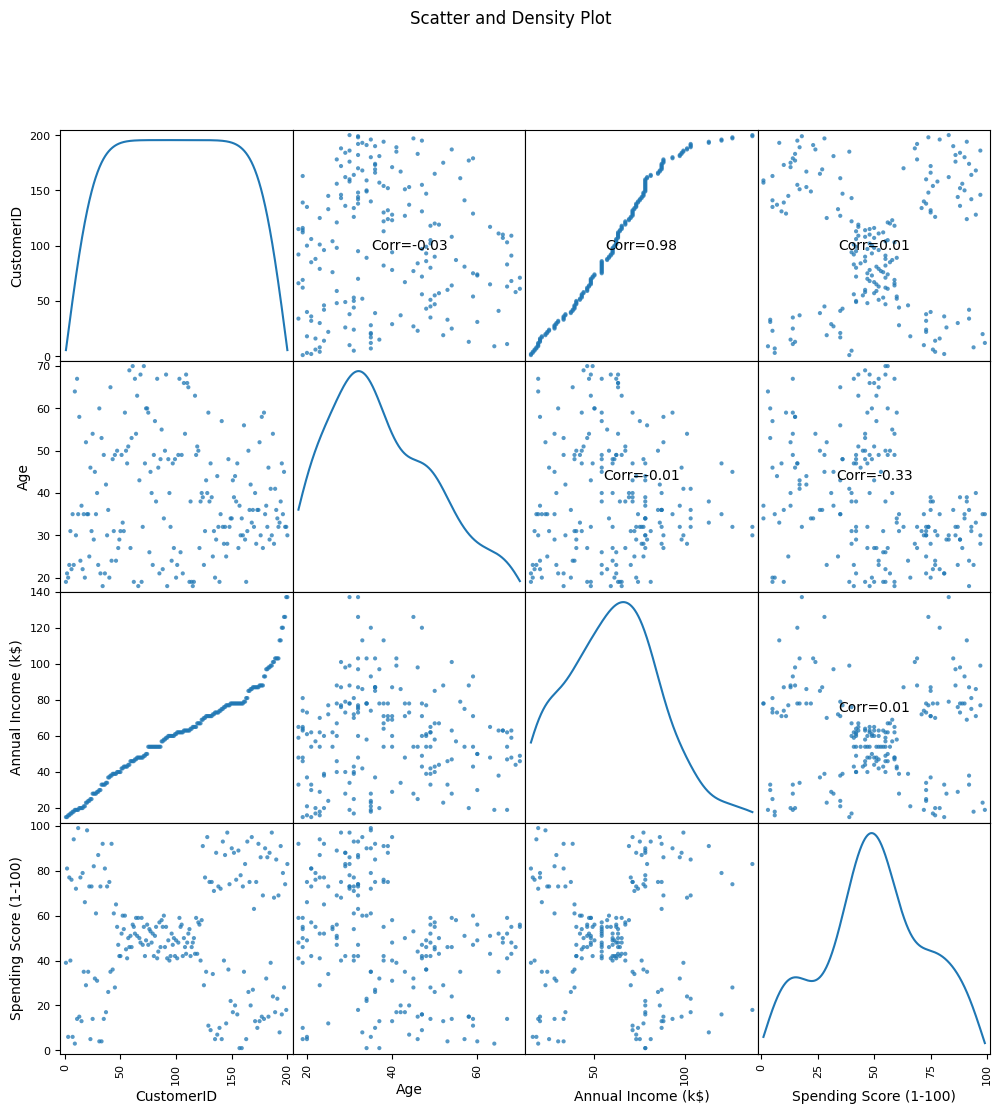

In [4]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print(f"Uploaded file name: {file_name}")

nRowsRead = 1000
df = pd.read_csv(file_name, delimiter=',', nrows=nRowsRead)
df.dataframeName = file_name

nRow, nCol = df.shape
print(f"\nThere are {nRow} rows and {nCol} columns in the dataset")
df.head(5)

def plotPerColumnDistribution(df, nGraphShown=10, nGraphPerRow=5):
    nunique = df.nunique()
    df_plot = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]
    nCol = df_plot.shape[1]
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)

    plt.figure(num=None, figsize=(6 * nGraphPerRow, 4 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')

    for i, col in enumerate(df_plot.columns[:nGraphShown]):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        if df_plot[col].dtype == 'object':
            df_plot[col].value_counts().plot.bar()
        else:
            df_plot[col].hist()
        plt.title(col)
        plt.xticks(rotation=90)
        plt.ylabel('counts')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

def plotCorrelationMatrix(df, graphWidth=8):
    df_numeric = df.select_dtypes(include=[np.number])
    df_numeric = df_numeric.dropna(axis=1, how='all')
    df_numeric = df_numeric[[col for col in df_numeric if df_numeric[col].nunique() > 1]]

    if df_numeric.shape[1] < 2:
        print("Not enough numeric columns to plot correlation matrix")
        return

    plt.figure(figsize=(graphWidth, graphWidth))
    sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f"Correlation Matrix for {df.dataframeName}", fontsize=15)
    plt.show()

def plotScatterMatrix(df, plotSize=12, textSize=10):
    df_numeric = df.select_dtypes(include=[np.number])
    df_numeric = df_numeric.dropna(axis=1, how='all')
    df_numeric = df_numeric[[col for col in df_numeric if df_numeric[col].nunique() > 1]]

    if df_numeric.shape[1] == 0:
        print("No numeric columns to plot scatter matrix")
        return

    columnNames = df_numeric.columns.tolist()
    if len(columnNames) > 10:
        columnNames = columnNames[:10]

    df_numeric = df_numeric[columnNames]

    ax = pd.plotting.scatter_matrix(df_numeric, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')

    corrs = df_numeric.corr().values
    for i, j in zip(*np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate(f'Corr={corrs[i, j]:.2f}', (0.5, 0.5), xycoords='axes fraction',
                          ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot', fontsize=textSize+2)
    plt.show()

print("\n=== Column Distributions ===")
plotPerColumnDistribution(df, 10, 5)

print("\n=== Correlation Matrix ===")
plotCorrelationMatrix(df, 8)

print("\n=== Scatter and Density Matrix ===")
plotScatterMatrix(df, 12, 10)